In [26]:
import os
import pandas as pd
from deep_translator import GoogleTranslator

Preparación de datos de competidores

In [304]:
import os
import pandas as pd

# Definir la ruta donde se encuentran los archivos
ruta_archivos = r"e:\Users\1077730\unir\Analisis-comentarios"

# Crear una lista para almacenar los datos
datos = []

# Iterar sobre los archivos en la ruta especificada
for archivo in os.listdir(ruta_archivos):
    if archivo.endswith(".txt"):
        # Extraer el nombre del hotel del nombre del archivo
        nombre_hotel = archivo.split("_")[1]
        
        # Leer el comentario del archivo
        with open(os.path.join(ruta_archivos, archivo), "r", encoding="utf-8") as file:
            comentario = file.read()
            comentario_es = GoogleTranslator(source='auto', target='es').translate(comentario)
                
        # Agregar el nombre del hotel y el comentario a la lista de datos
        datos.append((nombre_hotel, comentario_es))

# Crear un DataFrame a partir de la lista de datos
df = pd.DataFrame(datos, columns=["Nombre Hotel", "Comentario"])

# Visualizar los primeros registros del DataFrame
print(df.head())


  Nombre Hotel                                         Comentario
0      affinia  Después de una estancia de una semana reciente...
1      affinia  Aunque demasiado caro en mi opinión, el hotel ...
2      affinia  Me alojé en el Affina Chicago para celebrar mi...
3      affinia  ESTE HOTEL ES FANTÁSTICO. Me alojé allí en mi ...
4      affinia  El Affinia Chicago es un lugar maravilloso don...


In [306]:
df

,Nombre Hotel,Comentario
0,affinia,Después de una estancia de una semana reciente...
1,affinia,"Aunque demasiado caro en mi opinión, el hotel ..."
2,affinia,Me alojé en el Affina Chicago para celebrar mi...
3,affinia,ESTE HOTEL ES FANTÁSTICO. Me alojé allí en mi ...
4,affinia,El Affinia Chicago es un lugar maravilloso don...
...,...,...
795,talbott,Me alojé en The Talbott por 3 noches por negoc...
796,talbott,Nos encantó el Talbott. La ubicación era fabul...
797,talbott,Puedo decir fácilmente que este es uno de los ...
798,talbott,Este es un gran hallazgo para el centro de Chi...


In [307]:
import pandas as pd
from textblob import TextBlob

# Función para analizar el sentimiento del comentario
def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    if polaridad > 0:
        return 'POSITIVO'
    elif polaridad < 0:
        return 'NEGATIVO'
    else:
        return 'NEUTRAL'

# Aplicar la función a cada comentario y agregar el resultado como una nueva columna
df['Sentimiento'] = df['Comentario'].apply(analizar_sentimiento)

df


,Nombre Hotel,Comentario,Sentimiento
0,affinia,Después de una estancia de una semana reciente...,NEUTRAL
1,affinia,"Aunque demasiado caro en mi opinión, el hotel ...",NEUTRAL
2,affinia,Me alojé en el Affina Chicago para celebrar mi...,NEUTRAL
3,affinia,ESTE HOTEL ES FANTÁSTICO. Me alojé allí en mi ...,NEUTRAL
4,affinia,El Affinia Chicago es un lugar maravilloso don...,NEUTRAL
...,...,...,...
795,talbott,Me alojé en The Talbott por 3 noches por negoc...,NEUTRAL
796,talbott,Nos encantó el Talbott. La ubicación era fabul...,NEUTRAL
797,talbott,Puedo decir fácilmente que este es uno de los ...,NEGATIVO
798,talbott,Este es un gran hallazgo para el centro de Chi...,POSITIVO


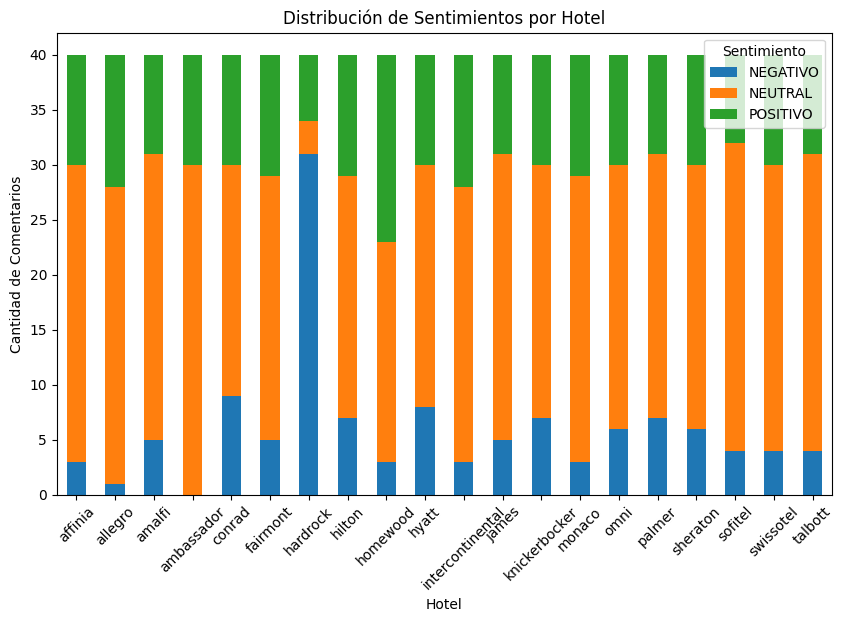

In [308]:

import matplotlib.pyplot as plt
# Contar la cantidad de comentarios por hotel y sentimiento
conteo_sentimientos = df.groupby(['Nombre Hotel', 'Sentimiento']).size().unstack(fill_value=0)

# Graficar la distribución de sentimientos por hotel
conteo_sentimientos.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Sentimientos por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')
plt.show()


In [309]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Función para analizar el sentimiento del comentario usando VADER
def analizar_sentimiento_vader(texto):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(texto)
    
    # Obtener la polaridad dominante
    if scores['compound'] >= 0.1:
        return 'NEUTRAL'
    elif scores['compound'] <= -0.8:
        return 'NEGATIVO'
    else:
        return 'POSITIVO'



# Aplicar la función de análisis de sentimiento usando VADER
df['Sentimiento_VADER'] = df['Comentario'].apply(analizar_sentimiento_vader)

df


,Nombre Hotel,Comentario,Sentimiento,Sentimiento_VADER
0,affinia,Después de una estancia de una semana reciente...,NEUTRAL,POSITIVO
1,affinia,"Aunque demasiado caro en mi opinión, el hotel ...",NEUTRAL,POSITIVO
2,affinia,Me alojé en el Affina Chicago para celebrar mi...,NEUTRAL,POSITIVO
3,affinia,ESTE HOTEL ES FANTÁSTICO. Me alojé allí en mi ...,NEUTRAL,POSITIVO
4,affinia,El Affinia Chicago es un lugar maravilloso don...,NEUTRAL,POSITIVO
...,...,...,...,...
795,talbott,Me alojé en The Talbott por 3 noches por negoc...,NEUTRAL,POSITIVO
796,talbott,Nos encantó el Talbott. La ubicación era fabul...,NEUTRAL,POSITIVO
797,talbott,Puedo decir fácilmente que este es uno de los ...,NEGATIVO,POSITIVO
798,talbott,Este es un gran hallazgo para el centro de Chi...,POSITIVO,POSITIVO


In [310]:
df

,Nombre Hotel,Comentario,Sentimiento,Sentimiento_VADER
0,affinia,Después de una estancia de una semana reciente...,NEUTRAL,POSITIVO
1,affinia,"Aunque demasiado caro en mi opinión, el hotel ...",NEUTRAL,POSITIVO
2,affinia,Me alojé en el Affina Chicago para celebrar mi...,NEUTRAL,POSITIVO
3,affinia,ESTE HOTEL ES FANTÁSTICO. Me alojé allí en mi ...,NEUTRAL,POSITIVO
4,affinia,El Affinia Chicago es un lugar maravilloso don...,NEUTRAL,POSITIVO
...,...,...,...,...
795,talbott,Me alojé en The Talbott por 3 noches por negoc...,NEUTRAL,POSITIVO
796,talbott,Nos encantó el Talbott. La ubicación era fabul...,NEUTRAL,POSITIVO
797,talbott,Puedo decir fácilmente que este es uno de los ...,NEGATIVO,POSITIVO
798,talbott,Este es un gran hallazgo para el centro de Chi...,POSITIVO,POSITIVO


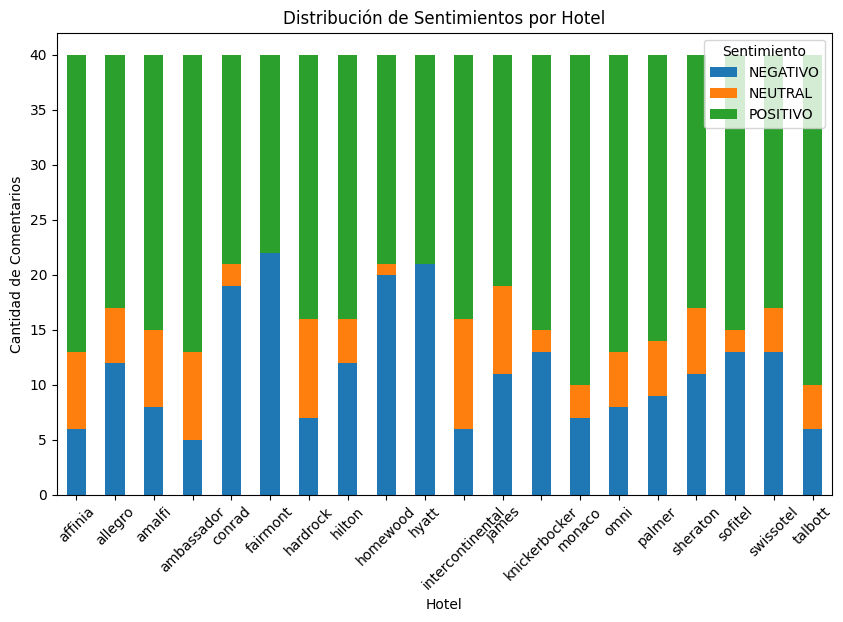

In [311]:

import matplotlib.pyplot as plt
# Contar la cantidad de comentarios por hotel y sentimiento
conteo_sentimientos = df.groupby(['Nombre Hotel', 'Sentimiento_VADER']).size().unstack(fill_value=0)

# Graficar la distribución de sentimientos por hotel
conteo_sentimientos.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Sentimientos por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')
plt.show()


Se observa que los hoteles con mayor número de comentarios con sentimiento POSITIVO son: 
    Knickerboxer, 
    Talbott,
    Sofitel
    
Se observa que los hoteles con mayor número de comentarios con sentimiento NEGATIVO son: 
    Fairmont,
    Hyatt,
    Homewood

In [312]:
df.to_csv('df_hoteles_Competencia.csv')

In [277]:
#NUMERO DE HOTELES COMPETIDORES
df[df['Sentimiento_VADER'] == 'POSITIVO']['Nombre Hotel'].nunique()

,count
talbott,28
habitación,23
personal,19
chicago,18
habitaciones,17
...,...
incompetentes,1
importa,1
gritaban,1
gasté,1


In [195]:
conteo_sentimientos = df.groupby('Sentimiento_VADER').size()
print(conteo_sentimientos)


Sentimiento_VADER
NEGATIVO    233
NEUTRAL      91
POSITIVO    476
dtype: int64


In [196]:
# Filtrar el DataFrame para incluir solo los comentarios con sentimiento positivo
df_positivos = df[df['Sentimiento_VADER'] == 'POSITIVO']
df_positivos
# Contar el número de comentarios positivos para cada hotel y ordenarlos
hoteles_positivos = df_positivos.groupby('Nombre Hotel').size().sort_values(ascending=False)
hoteles_positivos


Nombre Hotel
monaco              31
talbott             30
sofitel             27
ambassador          27
palmer              27
knickerbocker       25
omni                25
affinia             25
amalfi              25
hardrock            24
intercontinental    24
hilton              23
sheraton            23
swissotel           23
allegro             22
james               21
homewood            19
hyatt               19
fairmont            18
conrad              18
dtype: int64

In [198]:
# Filtrar el DataFrame para incluir solo los comentarios con sentimiento positivo
df_negativos = df[df['Sentimiento_VADER'] == 'NEGATIVO']

# Contar el número de comentarios positivos para cada hotel y ordenarlos
hoteles_negativos = df_negativos.groupby('Nombre Hotel').size().sort_values(ascending=False)
hoteles_negativos


Nombre Hotel
fairmont            22
hyatt               21
homewood            20
conrad              20
swissotel           13
knickerbocker       13
hilton              13
sofitel             12
allegro             12
james               11
omni                11
sheraton            11
amalfi               8
palmer               8
hardrock             7
monaco               7
affinia              7
intercontinental     6
talbott              6
ambassador           5
dtype: int64

In [199]:
# Filtrar el DataFrame para incluir solo los comentarios con sentimiento positivo
df_neutros = df[df['Sentimiento_VADER'] == 'NEUTRAL']

# Contar el número de comentarios positivos para cada hotel y ordenarlos
hoteles_df_neutros = df_neutros.groupby('Nombre Hotel').size().sort_values(ascending=False)
hoteles_df_neutros


Nombre Hotel
intercontinental    10
hardrock             9
affinia              8
james                8
ambassador           8
amalfi               7
allegro              6
sheraton             6
palmer               5
hilton               4
omni                 4
swissotel            4
talbott              4
conrad               2
knickerbocker        2
monaco               2
homewood             1
sofitel              1
dtype: int64

In [200]:
df.to_csv('sentimientos-hoteles.csv')

REVISIÓN DE PALABRAS CLAVE
técnicas de procesamiento de texto
tokenización y eliminación de palabras vacías.

In [201]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Definir una función para filtrar las preposiciones
def filter_prepositions(tokens):
    preposiciones_espanol = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia",
                        "hasta", "mediante", "para", "por", "según", "sin", "sobre", "tras", "el", "la", "los", "las",
                        "yo", "tú", "él", "ella", "ellas", "ellos", "nosotros", "ustedes", "esos", "eso", "y", "mi", "su",
                        "es", "un", "uno", "unas", "unos", "fue", "al", "lo", "que", "si", "estaba", "estuvo", "ni", "nos",
                        "pude", "sido", "una", "aquí", "como", "cuando", "donde", "quien", "tiene", "tenía", "porque", 
                        "más", "mas", "sí", "sólo", "también", "todo", "pero", "bien", "poco", "hace", "hacer", "hago",
                        "han", "he", "hoy", "les", "nosotras", "vosotras", "vosotros", "vos", "tú", "tus", "tuyo", "tuya",
                        "tuyos", "tuyas", "están", "estás", "está", "estáis", "estad", "estuve", "estuviste", "estuvo",
                        "estuvimos", "estuvisteis", "estuvieron", "haber", "había", "habías", "habíamos", "habíais",
                        "habían", "habré", "habrás", "habrá", "habremos", "habréis", "habrán", "habría", "habrías",
                        "habríamos", "habríais", "habrían", "había", "habías", "habíamos", "habíais", "habían", "hay",
                        "hube", "hubiste", "hubo", "hubimos", "hubisteis", "hubieron", "haya", "hayas", "hayamos",
                        "hayáis", "hayan", "habré", "habrás", "habrá", "habremos", "habréis", "habrán", "habría",
                        "habrías", "habríamos", "habríais", "habrían", "hice", "hiciste", "hizo", "hicimos", "hicisteis",
                        "hicieron", "hago", "haces", "hace", "hacemos", "hacéis", "hacen", "haga", "hagas", "hagamos",
                        "hagáis", "hagan", "hacía", "hacías", "hacíamos", "hacíais", "hacían", "hube", "hubiste", "hubo",
                        "hubimos", "hubisteis", "hubieron", "hubiera", "hubieras", "hubiéramos", "hubierais",
                        "hubieran", "hubiese", "hubieses", "hubiésemos", "hubieseis", "hubiesen", "habiendo", "habido",
                        "habida", "habidos", "habidas", "tenido", "tenida", "tenidos", "tenidas", "teniendo", "tengo",
                        "tienes", "tiene", "tenemos", "tenéis", "tienen", "tendré", "tendrás", "tendrá", "tendremos",
                        "tendréis", "tendrán", "tendría", "tendrías", "tendríamos", "tendríais", "tendrían", "tuve",
                        "tuviste", "tuvo", "tuvimos", "tuvisteis", "tuvieron", "tuviera", "tuvieras", "tuviéramos",
                        "tuvierais", "tuvieran", "tuviese", "tuvieses", "tuviésemos", "tuvieseis", "tuviesen",
                        "teniendo", "tenido", "tenida", "tenidos", "tenidas", "tened"]
    return [word for word in tokens if word.lower() not in preposiciones_espanol]



In [226]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Tokenización y eliminación de palabras vacías, descartando palabras que contienen números
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b')
X = vectorizer.fit_transform(df['Comentario'])

# Obtener las palabras clave
feature_names1 = vectorizer.get_feature_names_out()

# Crear DataFrame de palabras clave
keywords_df_positivos = pd.DataFrame(X.toarray(), columns=feature_names1)

# Agregar la columna "Nombre Hotel"
keywords_df_positivos["Nombre Hotel"] = df["Nombre Hotel"]

keywords_df_positivos



,aaa,abajo,abandonados,abarcaba,abarrotadas,abastecido,abastecidos,abierta,abiertas,abierto,...,último,últimos,única,únicamente,únicas,único,únicos,útil,útiles,Nombre Hotel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affinia
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affinia
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,affinia
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affinia
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,affinia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,talbott
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,talbott
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,talbott
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,talbott


In [227]:
# Sumar el recuento de cada palabra clave por hotel
keywords_por_hotel = keywords_df_positivos.groupby('Nombre Hotel').sum()
keywords_por_hotel

,aaa,abajo,abandonados,abarcaba,abarrotadas,abastecido,abastecidos,abierta,abiertas,abierto,...,últimas,último,últimos,única,únicamente,únicas,único,únicos,útil,útiles
Nombre Hotel,,,,,,,,,,,,,,,,,,,,,
affinia,0,2,0,0,0,0,1,0,0,0,...,0,2,0,0,0,0,0,0,0,0
allegro,1,3,0,0,1,1,0,0,0,0,...,0,2,1,1,0,0,2,0,0,0
amalfi,0,0,0,0,0,0,0,0,1,0,...,0,4,0,2,0,0,3,0,1,0
ambassador,0,1,0,0,0,0,0,0,0,0,...,0,2,1,3,0,0,2,0,0,0
conrad,0,2,0,0,0,0,0,1,1,1,...,0,1,0,1,0,2,0,0,0,0
fairmont,0,1,0,0,0,0,0,1,0,0,...,0,4,1,1,0,0,2,0,2,0
hardrock,0,0,0,0,0,0,0,0,0,1,...,0,2,0,2,0,0,2,1,0,1
hilton,1,3,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,5,0,1,0
homewood,0,1,0,0,0,0,0,3,0,0,...,1,1,0,2,1,0,6,0,0,0


In [296]:
# Transponer el DataFrame para intercambiar filas y columnas
keywords_por_hotel_transpuesto = keywords_df_positivos[keywords_df_positivos["Nombre Hotel"]=='fairmont'].transpose()
keywords_por_hotel_transpuesto



,100,101,102,103,104,105,106,107,108,109,...,510,511,512,513,514,515,516,517,518,519
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abajo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
abandonados,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abarcaba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abarrotadas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
único,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
únicos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
útil,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
útiles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
keywords_por_hotel_transpuesto.to_csv('words.csv')

In [297]:
# Obtener una lista de palabras clave por nombre de hotel, excluyendo la última fila
lista_keywords = keywords_por_hotel_transpuesto.iloc[:-1].apply(lambda x: x.index[x.gt(0)].tolist()).to_dict()
lista_keywords

{100: ['american',
  'aparentemente',
  'aquí',
  'chicago',
  'cogiendo',
  'costó',
  'cuando',
  'dijeron',
  'edificio',
  'el',
  'en',
  'es',
  'fairmont',
  'fue',
  'fumadores',
  'girl',
  'grosero',
  'habitación',
  'idea',
  'increíblemente',
  'la',
  'linda',
  'lo',
  'millennium',
  'motivo',
  'más',
  'ningún',
  'noche',
  'nos',
  'nunca',
  'otro',
  'paquete',
  'para',
  'park',
  'personal',
  'place',
  'por',
  'que',
  'recomendaría',
  'reservamos',
  'restaurante',
  'su',
  'tendríamos',
  'terminé',
  'una',
  'venir',
  'vista',
  'y'],
 101: ['allí',
  'aloja',
  'alojaba',
  'buen',
  'camas',
  'chicago',
  'comida',
  'del',
  'desagradable',
  'diseños',
  'distracción',
  'duras',
  'e',
  'el',
  'elegantes',
  'en',
  'era',
  'eran',
  'este',
  'estuve',
  'estuvieran',
  'experiencia',
  'fairmont',
  'fue',
  'general',
  'gente',
  'grosero',
  'hace',
  'hotel',
  'incómodas',
  'la',
  'las',
  'lo',
  'los',
  'luces',
  'lugar',
  'mala

In [298]:

all_keywords = keywords_por_hotel_transpuesto.iloc[:-1].apply(lambda x: x.index[x.gt(0)].tolist()).sum()


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))  
# Filtrar las stopwords
stop_words.add('hotel')
filtered_keywords = [word for word in all_keywords if word.lower() not in stop_words]

keyword_counts = pd.Series(filtered_keywords).value_counts().sort_values(ascending=False)
keyword_counts

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060]
[nltk_data]     Se produjo un error durante el intento de conexión ya
[nltk_data]     que la parte conectada no respondió adecuadamente tras
[nltk_data]     un periodo de tiempo, o bien se produjo un error en la
[nltk_data]     conexión establecida ya que el host conectado no ha
[nltk_data]     podido responder>


habitación    34
fairmont      29
chicago       27
millennium    18
park          18
              ..
escribiría     1
envié          1
encontraba     1
elegir         1
sonrisas       1
Name: count, Length: 1539, dtype: int64

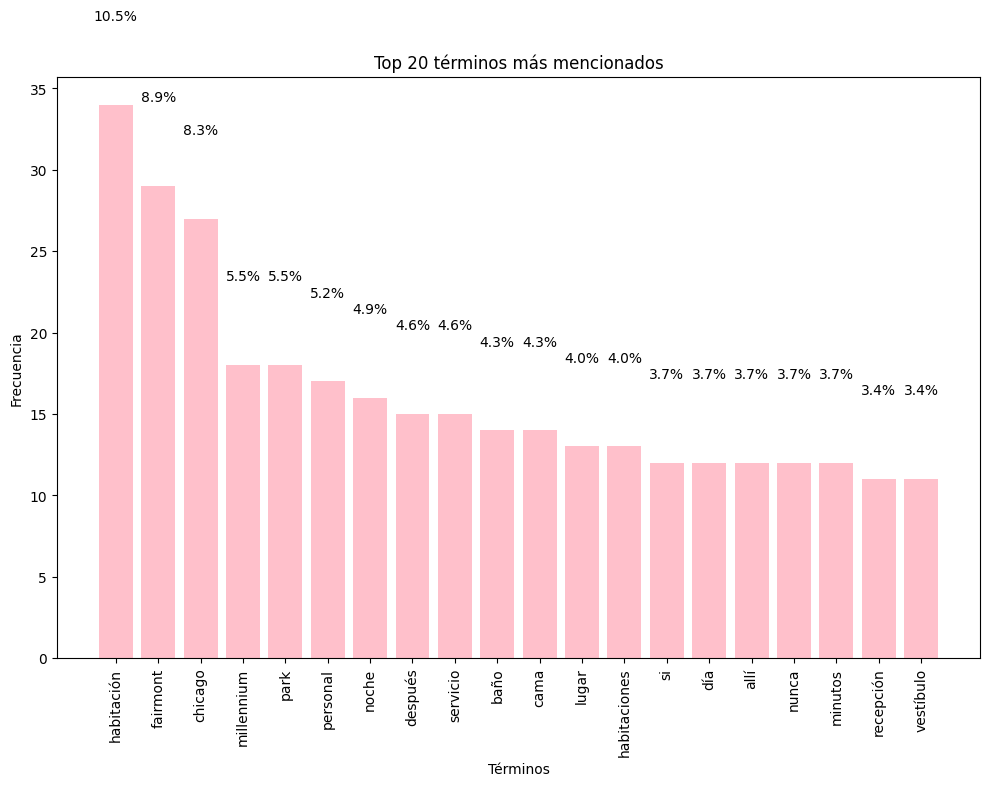

In [299]:
import matplotlib.pyplot as plt
import numpy as np


top_keywords = list(keyword_counts.keys())[:20]
counts = keyword_counts[:20]  # Use indexing to get the first 20 elements

# Ordenar los datos de mayor a menor
sorted_indices = np.argsort(counts)[::-1]  # Índices ordenados de forma descendente
sorted_counts = np.array([counts[i] for i in sorted_indices])
sorted_keywords = [top_keywords[i] for i in sorted_indices]

# Calcular porcentajes
total = np.sum(sorted_counts)
percentages = (sorted_counts / total) * 100

# Crear el gráfico de barras ordenado con porcentajes
plt.figure(figsize=(10, 8))
bars = plt.bar(sorted_keywords, sorted_counts, color='pink')

# Agregar etiquetas con porcentajes
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.xlabel('Términos')
plt.ylabel('Frecuencia')
plt.title('Top 20 términos más mencionados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [300]:
keyword_counts

habitación    34
fairmont      29
chicago       27
millennium    18
park          18
              ..
escribiría     1
envié          1
encontraba     1
elegir         1
sonrisas       1
Name: count, Length: 1539, dtype: int64

In [301]:
df = pd.DataFrame(keyword_counts)
df

,count
habitación,34
fairmont,29
chicago,27
millennium,18
park,18
...,...
escribiría,1
envié,1
encontraba,1
elegir,1


In [302]:
df.to_csv('conteo_palabras_fairmont.csv')